In [17]:
import sys
import pandas as pd
sys.path.append("/home/antonlee/github.com/tachyonicClock/SurpriseNetRun/SurpriseNet")
from study.study import vizier_client_via_ssh, vz

client = vizier_client_via_ssh(
    owner="SurpriseNet",
    study_id="LrEpochSearch"
)
# client.delete()

In [18]:

trial_records = []
for trial in client.trials():
    trial = trial.materialize()
    print(trial)

    if trial.final_measurement is None:
        continue

    trial_record = {}
    trial_record["feasible"] = trial._infeasibility_reason is None
    trial_record["length"] = trial.duration

    for param_name, param in trial.parameters.items():
        trial_record[param_name] = float(param.value)

    for metric_name, metric in trial.final_measurement.metrics.items():
        trial_record[metric_name] = float(metric.value)
    trial_records.append(trial_record)

df = pd.DataFrame(trial_records)


Trial(parameters=ParameterDict(_items={'classifier_loss_weight': 0.0, 'latent_dims': 8.0, 'learning_rate': 0.0029385043021217796, 'total_task_epochs': 258.0, 'retrain_epochs': 64.0}), metadata=Metadata((namespace:, items: {}), current_namespace=), id=1, is_requested=False, assigned_worker='cuda9.ecs.vuw.ac.nz::1968580', stopping_reason=None, _infeasibility_reason='Error during training', description='owners/SurpriseNet/studies/LrEpochSearch/trials/1', related_links={}, final_measurement=Measurement(metrics={'TaskIdAccuracy': Metric(value=0.0, std=None)}, elapsed_secs=0.0, steps=0, checkpoint_path=''), measurements=[], creation_time=05/18/23 17:23:58, completion_time=None)
Trial(parameters=ParameterDict(_items={'classifier_loss_weight': 0.0, 'latent_dims': 8.0, 'learning_rate': 0.002207939307239487, 'total_task_epochs': 293.0, 'retrain_epochs': 99.0}), metadata=Metadata((namespace:, items: {}), current_namespace=), id=2, is_requested=False, assigned_worker='cuda10.ecs.vuw.ac.nz::3344707

In [14]:
df.TaskIdAccuracy.max()

0.5723999738693237

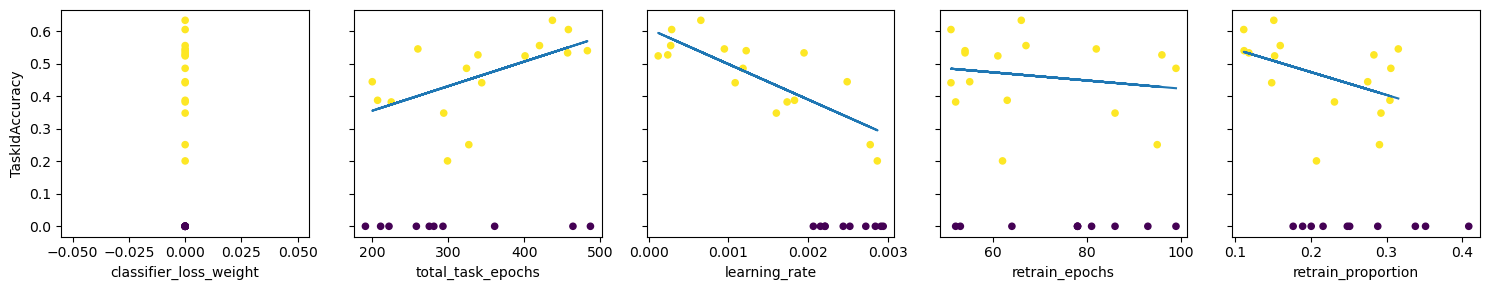

In [34]:
from matplotlib import pyplot as plt
import numpy as np

df["retrain_proportion"] = df["retrain_epochs"] / df["total_task_epochs"]

# # Create 3 subplots sharing y axis
independent_vars = ["classifier_loss_weight", "total_task_epochs", "learning_rate", "retrain_epochs", "retrain_proportion"]
dependent_var = "TaskIdAccuracy"
fig, axis = plt.subplots(1, len(independent_vars), sharey=True, figsize=(len(independent_vars)*3, 3), tight_layout=True)

for i, independent_var in enumerate(independent_vars):
    df.plot.scatter(x=independent_var, y=dependent_var, ax=axis[i], c=df["feasible"])
    # Fit line

    try:
        feasible_points = df[df["feasible"] == True]
        x = feasible_points[independent_var]
        y = feasible_points[dependent_var]

        # Linear regression
        m, b = np.polyfit(x, y, 1)
        axis[i].plot(x, m*x + b)
    except Exception:
        pass

    axis[i].set_xlabel(independent_var)
    axis[i].set_ylabel(dependent_var)


Text(0, 0.5, 'TaskIdAccuracy')

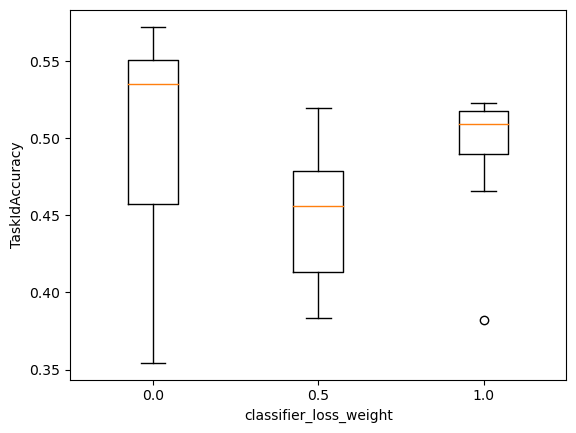

In [80]:
# Box and whisker plot of classifier_loss_weight

# remove outliers
no_outliers = df[df["TaskIdAccuracy"] > 0.25]

boxes = []
labels = []
for loss_weight, points in no_outliers.groupby("classifier_loss_weight"):
    boxes.append(points["TaskIdAccuracy"])
    labels.append(loss_weight)

plt.boxplot(boxes, labels=labels)

# Label the axes
plt.xlabel("classifier_loss_weight")
plt.ylabel("TaskIdAccuracy")


# plt.boxplot(no_outliers["TaskIdAccuracy"])

In [3]:
import matplotlib.pyplot as plt

x = []
y = []
value = []

for trial in client.trials():
    trial = trial.materialize()
    if trial.final_measurement is None:
        continue

    value.append(trial.final_measurement.metrics["maximize_metric"].value)
    # x.append(float(trial.parameters["x"].value))
    # y.append(float(trial.parameters["y"].value))

plt.scatter(x, y, c=value)


KeyError: 'maximize_metric'